# Postwork 3

En este Postwork vamos a explorar las distribuciones de las variables categóricas de nuestro dataset. En el postwork pasado exploramos las variables numéricas y ya deberías de tener una idea general bastante buena de cómo están organizadas. Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.

- Identifica todas las variables categóricas en tu dataset.

- Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.

- Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?

- Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.

- Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
De preferencia ve registrando por escrito (ahí mismo en tu Notebook) todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'dark')

In [3]:
data = pd.read_csv("Marvel Movies.csv")
data.head()

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


Las variables categóricas de este conjunto de datos son:

- **ID** que establece el estado de la identidad del personaje. 
- **ALIGN** que indica si el personaje es bueno, malo o neutral.
- **EYE** nos dice el color de los ojos del personaje.
- **HAIR** es el color del cabello del personaje.
- **SEX** nos da el sexo del personaje, femenino, masculino, etc.
- **GSM** nos dice si el personaje pertenece a una minoría sexual o de género.
- **ALIVE** nos específica si el personaje está vivo o muerto actualmente.

Si queremos conocer con precisión cuáles son las categorías de cada una de las variables categóricas que nos encontramos, podemos utilizar el método `unique` aplicado sobre cada una de las variables.

In [4]:
data['ID'].unique()

array(['Secret Identity', 'Public Identity', 'No Dual Identity',
       'Known to Authorities Identity', nan], dtype=object)

Ahora que sabemos las categorías de la variable `ID` podemos contar cuántas hay de cada categoría, usamos `value_counts()`. 

In [5]:
id_counts = data['ID'].value_counts()

id_counts

Secret Identity                  6275
Public Identity                  4528
No Dual Identity                 1788
Known to Authorities Identity      15
Name: ID, dtype: int64

Ahora que tenemos el conteo de cada una de las categorías de la variable `ID`, podemos generar sus gráficos de barras para darnos una mejor idea de la distribución de los datos. 

Text(0, 0.5, 'Número de personajes')

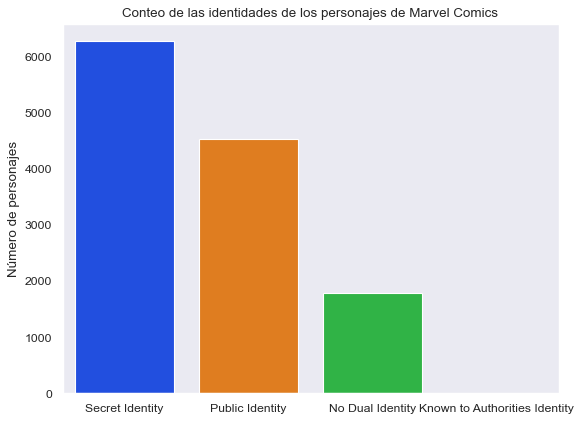

In [6]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = id_counts.index, y = id_counts, palette= 'bright')
ax.set_title('Conteo de las identidades de los personajes de Marvel Comics')
ax.set_ylabel('Número de personajes')

Podemos observar que, como era de esperar, la mayoría de los personajes de Marvel prefieren mantener su identidad secreta. 
Haremos lo mismo con el resto de las variables categóricas.

Para la variable `ALIGN`:

In [7]:
data['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [8]:
align_counts = data['ALIGN'].value_counts()

align_counts

Bad Characters        6720
Good Characters       4636
Neutral Characters    2208
Name: ALIGN, dtype: int64

Adicionalmente, si quisieramos obtener el conteo de cada una de las categorías como una proporción respecto al total, simplemente aplicamos una regla de 3 y lo expresamos como porcentaje.

In [9]:
percentage_align = align_counts * 100 / align_counts.sum()


Text(0, 0.5, 'Porcentaje de personajes')

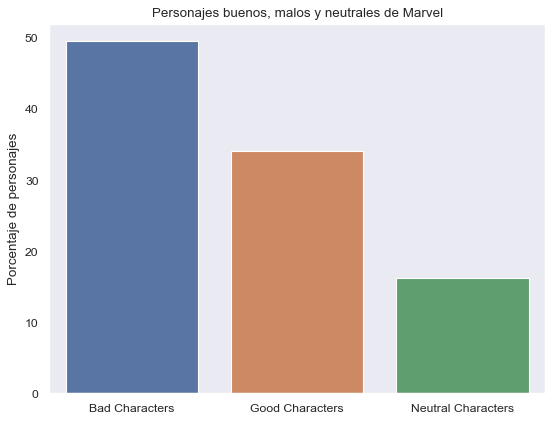

In [28]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(x = percentage_align.index, y = percentage_align)
ax.set_title('Personajes buenos, malos y neutrales de Marvel')
ax.set_ylabel('Porcentaje de personajes')

Es interesante observar que hay una mayor cantidad de personajes malos, o "villanos", en relación a los buenos personajes. Esto contradice el viejo dicho *los buenos somos más*, pero también tiene sentido que hayan más villanos, de lo contrario la vida del superhéroe sería aburrida.

Vamos a ver la variable `EYE`

In [11]:
data['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

Hay 23 distintos colores de ojos, ¡gran variedad!

In [30]:
eye_colors = data['EYE'].value_counts()

eye_colors


Blue Eyes          1962
Brown Eyes         1924
Green Eyes          613
Black Eyes          555
Red Eyes            508
White Eyes          400
Yellow Eyes         256
Grey Eyes            95
Hazel Eyes           76
Variable Eyes        49
Purple Eyes          31
Orange Eyes          25
Pink Eyes            21
One Eye              21
Gold Eyes            14
Silver Eyes          12
Violet Eyes          11
Amber Eyes           10
Multiple Eyes         7
No Eyes               7
Yellow Eyeballs       6
Black Eyeballs        3
Magenta Eyes          2
Compound Eyes         1
Name: EYE, dtype: int64

Text(0, 0.5, 'Tipo de ojos')

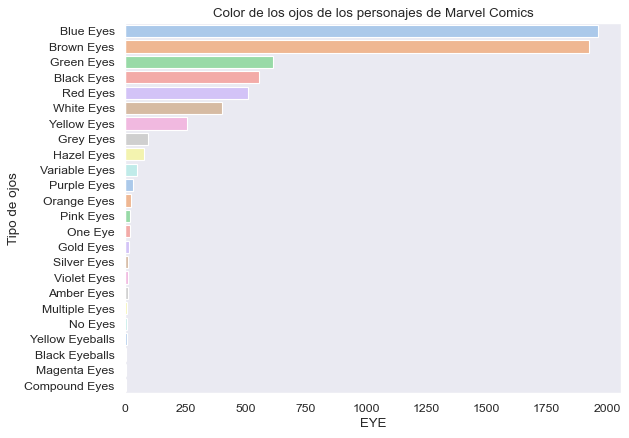

In [31]:
fig = plt.figure(figsize=(8,6), dpi = 80)

ax = sns.barplot(y = eye_colors.index, x = eye_colors, palette='pastel')
ax.set_title('Color de los ojos de los personajes de Marvel Comics')
ax.set_ylabel('Tipo de ojos')

Podemos observar que los ojos azules y cafés predominan en todos los personajes de Marvel. Cosa curiosa resultan los de ojos violeta, color oro y más aún ¡los que tienen múltiples ojos!
Con la variable `HAIR` ocurre algo similar.

In [32]:
data['HAIR'].unique()

array(['Brown Hair', 'White Hair', 'Black Hair', 'Blond Hair', 'No Hair',
       'Blue Hair', 'Red Hair', 'Bald', 'Auburn Hair', 'Grey Hair',
       'Silver Hair', 'Purple Hair', 'Strawberry Blond Hair',
       'Green Hair', 'Reddish Blond Hair', 'Gold Hair', nan,
       'Orange Hair', 'Pink Hair', 'Variable Hair', 'Yellow Hair',
       'Light Brown Hair', 'Magenta Hair', 'Bronze Hair', 'Dyed Hair',
       'Orange-brown Hair'], dtype=object)

In [33]:
hair_count = data['HAIR'].value_counts()

hair_count

Black Hair               3755
Brown Hair               2339
Blond Hair               1582
No Hair                  1176
Bald                      838
White Hair                754
Red Hair                  620
Grey Hair                 531
Green Hair                117
Auburn Hair                78
Blue Hair                  56
Strawberry Blond Hair      47
Purple Hair                47
Orange Hair                43
Variable Hair              32
Pink Hair                  31
Yellow Hair                20
Silver Hair                16
Gold Hair                   8
Reddish Blond Hair          6
Light Brown Hair            6
Magenta Hair                5
Orange-brown Hair           3
Bronze Hair                 1
Dyed Hair                   1
Name: HAIR, dtype: int64

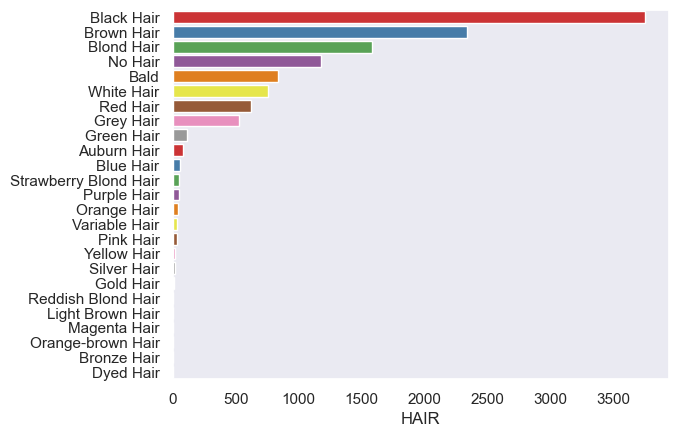

In [34]:
fig = plt.plot(figsize = (8,6), dpi = 80)
ax = sns.barplot(y = hair_count.index, x = hair_count, palette = 'Set1' )

Veamos ahora qué ocurre con la categoría `SEX`

In [35]:
data['SEX'].unique()

array(['Male Characters', 'Female Characters', 'Genderfluid Characters',
       'Agender Characters', nan], dtype=object)

In [36]:
sex_count = data['SEX'].value_counts()

sex_count_pct = sex_count * 100 / sex_count.sum()

sex_count_pct

Male Characters           74.977451
Female Characters         24.719753
Agender Characters         0.289911
Genderfluid Characters     0.012885
Name: SEX, dtype: float64

En esta ocasión obtuvimos la proporción de cada categoría, grafiquemos.

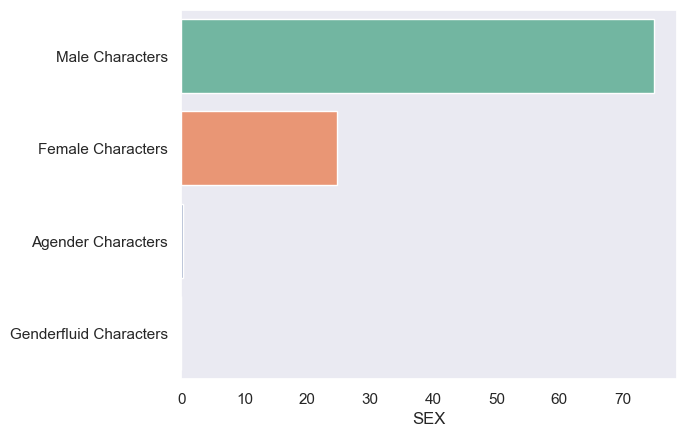

In [14]:
fig = plt.plot(figsize = (8,6), dpi = 80)

ax = sns.barplot(y = sex_count_pct.index, x = sex_count_pct, palette = 'Set2')

Es notoria la predominancia de personajes masculinos, respecto a la cantidad de personajes femeninos, y más aún de personajes con otra identidad de género. Ahí hay una brecha que debería cerrarse poco a poco.

Finalmente, veamos qué ocurre con la variable `ALIVE`

In [16]:
data['ALIVE'].unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

Como era de esperarse, sólo tenemos dos categorías, que nos indican si el personaje está vivo o no.
Obtengamos su gráfica de barras.

In [38]:
alive_count = data['ALIVE'].value_counts()

alive_count

Living Characters      12608
Deceased Characters     3765
Name: ALIVE, dtype: int64

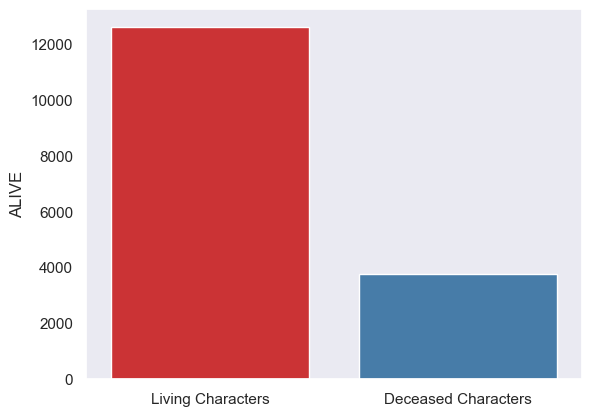

In [39]:
fig = plt.plot(figsize = (8,6), dapi = 80)

ax = sns.barplot(x = alive_count.index, y = alive_count, palette = 'Set1')


Aproximadamente, 1/4 del total de personajes ha perecido, tal vez en alguna batalla.

Ahora, hagamos cosas más interesantes con este conjunto de datos. Podemos elaborar tablas de frecuencia, también conocidas como tablas de contingencia o tablas multidimensionales.
Para ello utilizamos el método `pd.crosstab()`, La ventaja de este tipo de estructuras es que pueden utilizarse para determinar si existe o no alguna relación entre la variable de la fila y la de la columna.

Construyamos una tabla de contingencia, digamos que estamos interesados en conocer si los personajes están vivos o no, de acuerdo a su tipo de identidad.

In [40]:
dead_alive_id = pd.crosstab(data['ID'], data['ALIVE'])

dead_alive_id

ALIVE,Deceased Characters,Living Characters
ID,,
Known to Authorities Identity,1,14
No Dual Identity,443,1345
Public Identity,1044,3484
Secret Identity,1628,4647


También podemos hacer que la tabla de contingencia contenga más información, crearemos otra tabla como la anterior, pero ahora queremos saber adicionalmente el sexo de los personajes.

Otro aspecto interesante de este tipo de tablas es que podemos añadir filas y columnas que nos den mayor información, como el total de datos en cierta categoría.

In [41]:
dead_alive_id_sex = pd.crosstab(data['ID'], [data['ALIVE'], data['SEX']], margins = True, margins_name= 'Total')

dead_alive_id_sex

ALIVE                         Deceased Characters                    \
SEX                            Agender Characters Female Characters   
ID                                                                    
Known to Authorities Identity                   0                 1   
No Dual Identity                                1               114   
Public Identity                                 2               185   
Secret Identity                                 1               330   
Total                                           4               630   

ALIVE                                          Living Characters  \
SEX                           Male Characters Agender Characters   
ID                                                                 
Known to Authorities Identity               0                  1   
No Dual Identity                          318                 10   
Public Identity                           840                  3   
Secret Identity                          1256                 13   
Total                                    2414                 27   

ALIVE                                                                   \
SEX                           Female Characters Genderfluid Characters   
ID                                                                       
Known to Authorities Identity                 4                      0   
No Dual Identity                            372                      1   
Public Identity                             866                      0   
Secret Identity                            1175                      1   
Total                                      2417                      2   

ALIVE                                          Total  
SEX                           Male Characters         
ID                                                    
Known to Authorities Identity               9     15  
No Dual Identity                          928   1744  
Public Identity                          2527   4423  
Secret Identity                          3250   6026  
Total                                    6714  12208

En esta última tabla, podemos notar que en primer lugar, hay más personajes masculinos muertos que femeninos y agéneros, y que además, hay más personajes que han fallecido y cuya identidad era secreta que aquellos con identidad pública o sin identidad dual.

Podemos extender aún más las tablas de contingencia, hasta hacerlas de muchas dimensiones. Claro que eso nos va a dar mucha más información respecto a las variables que son de nuestro interés. Hagamos una última tabla que contenga la información de las dos anteriores, pero ahora vamos a incluir si eran buenos, malos o neutrales.

In [42]:
dead_alive_align = pd.crosstab(data['ID'], [data['ALIVE'], data['SEX'],data['ALIGN']], margins = True, margins_name= 'Total')

dead_alive_align


ALIVE                         Deceased Characters                     \
SEX                            Agender Characters                      
ALIGN                              Bad Characters Neutral Characters   
ID                                                                     
Known to Authorities Identity                   0                  0   
No Dual Identity                                0                  1   
Public Identity                                 1                  1   
Secret Identity                                 1                  0   
Total                                           2                  2   

ALIVE                                                            \
SEX                           Female Characters                   
ALIGN                            Bad Characters Good Characters   
ID                                                                
Known to Authorities Identity                 1               0   
No Dual Identity                             12              47   
Public Identity                              37              71   
Secret Identity                             155              89   
Total                                       205             207   

ALIVE                                                             \
SEX                                              Male Characters   
ALIGN                         Neutral Characters  Bad Characters   
ID                                                                 
Known to Authorities Identity                  0               0   
No Dual Identity                              34             138   
Public Identity                               50             445   
Secret Identity                               62             790   
Total                                        146            1373   

ALIVE                                                             \
SEX                                                                
ALIGN                         Good Characters Neutral Characters   
ID                                                                 
Known to Authorities Identity               0                  0   
No Dual Identity                           83                 55   
Public Identity                           182                120   
Secret Identity                           243                135   
Total                                     508                310   

ALIVE                          Living Characters                  \
SEX                           Agender Characters                   
ALIGN                             Bad Characters Good Characters   
ID                                                                 
Known to Authorities Identity                  0               0   
No Dual Identity                               6               3   
Public Identity                                2               1   
Secret Identity                                8               2   
Total                                         16               6   

ALIVE                                                               \
SEX                                              Female Characters   
ALIGN                         Neutral Characters    Bad Characters   
ID                                                                   
Known to Authorities Identity                  1                 0   
No Dual Identity                               1                42   
Public Identity                                0               102   
Secret Identity                                3               419   
Total                                          5               563   

ALIVE                                                             \
SEX                                                                
ALIGN                         Good Characters Neutral Characters   
ID                                                                 
Known

Ocurre algo curioso en el caso de los personajes fallecidos femeninos: hay una cantidad casi igual, tanto de villanas como de heroínas, 205 y 207 respectivamente. 

Sin embargo, en el caso de los personajes masculinos, hay 1373 villanos fallecidos y 508 héroes fallecidos también. La proporción es muy distinta al caso de las heroínas. Curioso.

Como una imagen dice más que mil palabras, podemos graficar estas tablas de contingencia usando gráficas múltiples.

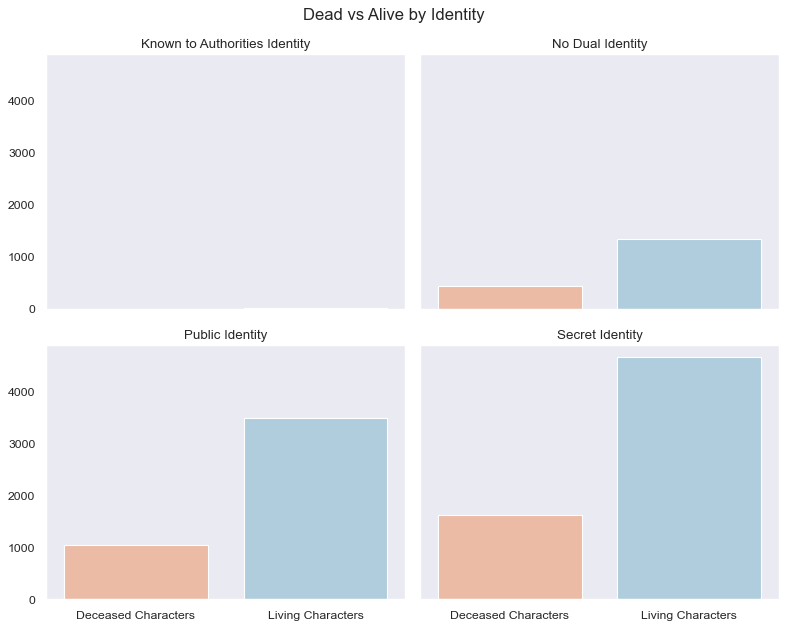

In [54]:
fig, axes = plt.subplots(2,2, figsize = (10,8), dpi = 80, sharex= True, sharey=True)

sns.barplot(x = dead_alive_id.columns,y = dead_alive_id.loc['Known to Authorities Identity'], ax = axes[0,0], palette= 'RdBu')
sns.barplot(x = dead_alive_id.columns, y = dead_alive_id.loc['No Dual Identity'], ax = axes[0,1], palette= 'RdBu')
sns.barplot(x = dead_alive_id.columns, y = dead_alive_id.loc['Public Identity'], ax = axes[1,0], palette= 'RdBu')
sns.barplot(x = dead_alive_id.columns, y = dead_alive_id.loc['Secret Identity'], ax = axes[1,1], palette= 'RdBu')

axes[0, 0].set(xlabel='', ylabel='', title='Known to Authorities Identity')
axes[0, 1].set(xlabel='', ylabel='', title='No Dual Identity')
axes[1, 0].set(xlabel='', ylabel='', title='Public Identity')
axes[1, 1].set(xlabel='', ylabel='', title='Secret Identity')
fig.suptitle('Dead vs Alive by Identity', fontsize=15)
plt.tight_layout()

In [26]:
data[(data['ID'] == 'Known to Authorities Identity') & (data['ALIVE'] == 'Deceased Characters')]

,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
2137,Leper Queen (Earth-616),Known to Authorities Identity,Bad Characters,Brown Eyes,Bald,Female Characters,NaN,Deceased Characters,17.0,6-Jan,2006.0


(array([ 741.,  519.,  279.,  119.,  148.,  130.,  462.,  586.,  561.,
         772., 1035.,  893.,  907.,  982., 1854., 1215.,  781., 1186.,
        1350., 1041.]),
 array([1939. , 1942.7, 1946.4, 1950.1, 1953.8, 1957.5, 1961.2, 1964.9,
        1968.6, 1972.3, 1976. , 1979.7, 1983.4, 1987.1, 1990.8, 1994.5,
        1998.2, 2001.9, 2005.6, 2009.3, 2013. ]),
 <BarContainer object of 20 artists>)

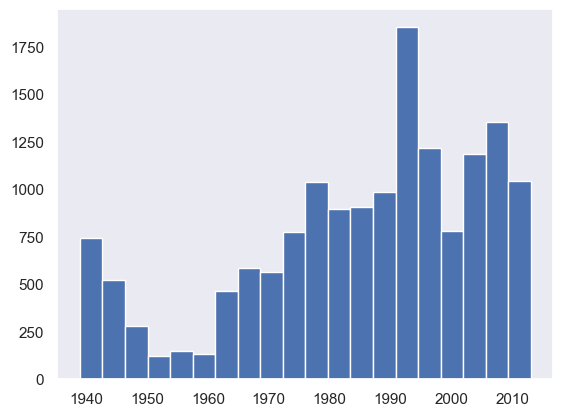

In [45]:
plt.hist(data['Year'], bins = 20)

<AxesSubplot: xlabel='Year'>

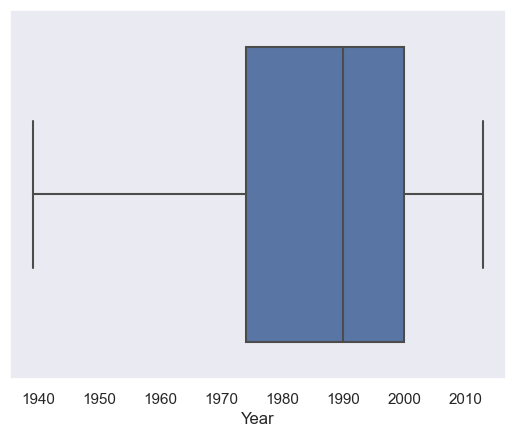

In [77]:
sns.boxplot(x =data['Year'])

<AxesSubplot: xlabel='APPEARANCES', ylabel='ALIGN'>

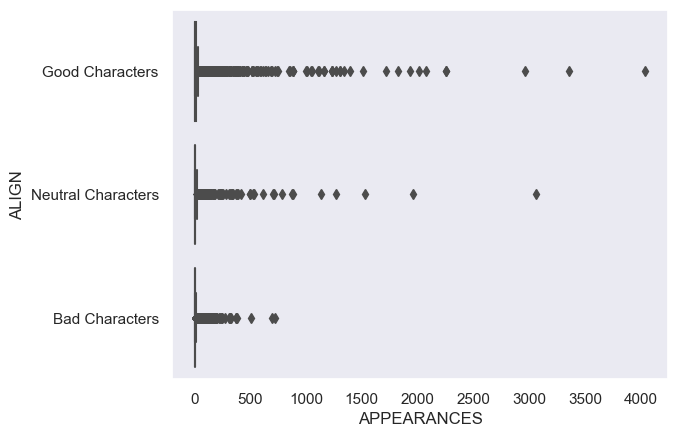

In [80]:
sns.boxplot(x = data['APPEARANCES'], y = data['ALIGN'])

<AxesSubplot: xlabel='APPEARANCES', ylabel='SEX'>

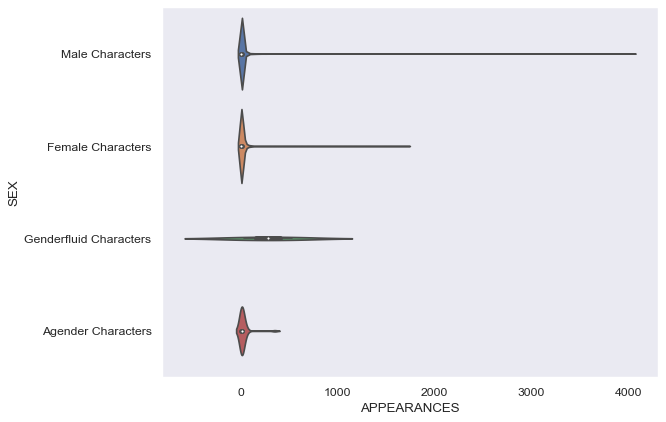

In [83]:
fig = plt.figure(figsize = (8,6), dpi = 80)
sns.violinplot(y = data['SEX'], x = data['APPEARANCES'])